# Shoes Recommender -(CNN|Transfer_learning)
    ~ This CNN based recommender system takes image of a shoe as input and recommends 5 similar shoes . 

In [1]:
#libraies
import os
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
import numpy as np

from sklearn.neighbors import NearestNeighbors 
import matplotlib.pyplot as plt
import cv2

**Saving paths of all the images :**

In [39]:
# saving paths 
paths=[]
for i in os.listdir('../input/shoe-vs-sandal-vs-boot-dataset-15k-images/Shoe vs Sandal vs Boot Dataset'):
    for j in glob.glob('../input/shoe-vs-sandal-vs-boot-dataset-15k-images/Shoe vs Sandal vs Boot Dataset/'+i+'/*.jpg'):
        paths.append(j)

In [5]:
# check
len(paths)

15000

# Now we will use Transfer Learning 
    
    ~ Here we will take all the layers from VGG16 model which is already trained on imagenet and we will freeze the weights of that model. 

In [6]:
#let's take layers from VGG16
model=tf.keras.Sequential()

vgg=VGG16(input_shape=(320,320,3),include_top=False)

model.add(vgg)
model.add(tf.keras.layers.Flatten())

2022-11-08 14:23:14.901526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:23:14.902426: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:23:15.049886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:23:15.050777: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:23:15.051642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 10, 10, 512)       14714688  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
# freezing_graphs
model.trainable=False

In [10]:
# let's get all the features by making prediction with our model which will output feature vector
features=[]

for i in paths:
    #loading image with target size as per model
    img=image.load_img(i,target_size=(320,320,3))
    
    #converting into array
    img=image.img_to_array(img)
    
    # converting single image into batch of single image
    img=np.expand_dims(img,axis=0)
    
    
    # let's get feature vector (predict)
    feature=model.predict(img).flatten()   
    
    #normalizing feature vector
    feature=feature/np.linalg.norm(feature)
    
    features.append(feature)

2022-11-08 14:23:49.331912: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-08 14:23:50.914860: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [13]:
#calculating similarities
neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='cosine')

#fit
neighbors.fit(features)

NearestNeighbors(algorithm='brute', metric='cosine')

In [29]:
# Now let's make recommender 
def recommend_shoe(la):
    img=image.load_img(la,target_size=(320,320,3))
    
    #converting into array
    img=image.img_to_array(img)
    
    # converting single image into batch of single image
    img=np.expand_dims(img,axis=0)
    
    
    # let's get feature vector (predict)
    feature=model.predict(img).flatten()
    
    #getting distance and indices of related shoes
    
    distance,indices=neighbors.kneighbors([feature])
    
    #let's plot those
    for i,j in enumerate(indices.flatten()):
        imag=cv2.imread(paths[j])
        plt.figure(i+1)
        plt.imshow(imag)

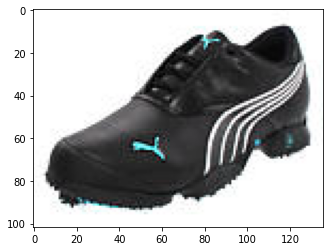

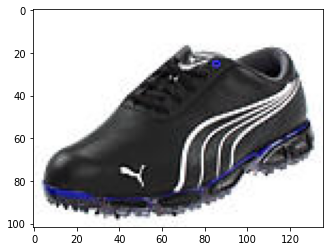

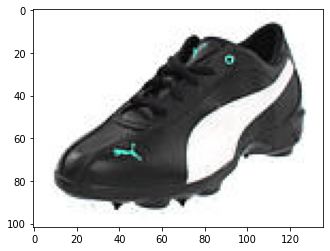

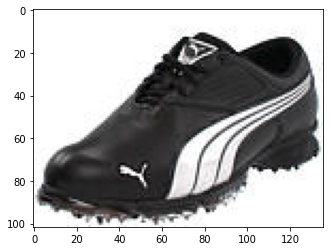

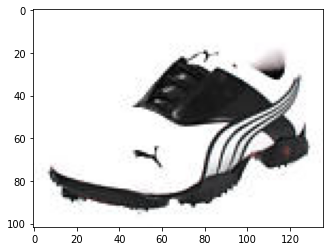

In [38]:
# let's test our function
recommend_shoe('../input/shoe-vs-sandal-vs-boot-dataset-15k-images/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg')